In [ ]:
import os
import pandas as pd
import plotly.graph_objects as go

# --- File paths ---
paths = [
    "03_Bacterial_mNGS_validation_LONG/200K_ZM Long (Not adjusted)/200K_ZM Long (Not adjusted)-sp-chi-sqrd-1-perc.csv",
    "03_Bacterial_mNGS_validation_LONG/200K_ZM Long (length-adjusted)/200K_ZM Long (length-adjusted)-sp-chi-sqrd-1-perc.csv",
    "04_Bacterial_mNGS_validation_SHORT/200K_ZM_SHORT/200K_ZM_SHORT-sp-chi-sqrd-1-perc.csv",
    "04_Bacterial_mNGS_validation_SHORT/200K_ZM Short (length-adjusted)/200K_ZM Short (length-adjusted)-sp-chi-sqrd-1-perc.csv"
]

# --- Load and concatenate all data ---
df_all = pd.concat([pd.read_csv(f) for f in paths], ignore_index=True)

# Extract subset and adjusted flag
df_all['Subset'] = df_all['dataset'].str.replace(r"\s*\(length-adjusted\)", "", regex=True)
df_all['Adjusted'] = df_all['dataset'].str.contains("length-adjusted")


# Normalize inconsistent naming
df_all['Subset'] = df_all['Subset'].replace({
    "200K_ZM Long (Not adjusted)": "200K_ZM Long",
    "200K_ZM_SHORT": "200K_ZM Short"
})
# Drop incomplete rows (e.g., MEGAN missing)
df_all = df_all.dropna(subset=['L1_distance'])

df_all

/Users/jazminvaleriano/Library/Mobile Documents/com~apple~CloudDocs/03 UNIFR MS/00. SP25/00.MASTER_THESIS/FINAL_CHAPTERS


,method,degrees,chi_squared_stat,crit_value,p_value,L1_distance,Reject_null_p<0.0045,Chi2>crit,threshold,dataset,Subset,Adjusted
0,KRAKEN,10,8.11,18.31,0.6180,0.2227,False,False,1,200K_ZM Long (Not adjusted),200K_ZM Long,False
1,CENTRIFUGER,10,234.28,18.31,0.0000,0.3401,True,True,1,200K_ZM Long (Not adjusted),200K_ZM Long,False
2,CENTRIFUGE,10,8.49,18.31,0.5810,0.3640,False,False,1,200K_ZM Long (Not adjusted),200K_ZM Long,False
3,KAIJU,10,147.62,18.31,0.0000,0.7823,True,True,1,200K_ZM Long (Not adjusted),200K_ZM Long,False
4,DIAMOND,10,4655.57,18.31,0.0000,0.7555,True,True,1,200K_ZM Long (Not adjusted),200K_ZM Long,False
5,MEGAN,10,115.76,18.31,0.0000,0.4031,True,True,1,200K_ZM Long (Not adjusted),200K_ZM Long,False
6,KRAKEN,10,108.46,18.31,0.0000,0.3676,True,True,1,200K_ZM Long (length-adjusted),200K_ZM Long,True
7,CENTRIFUGER,10,598.82,18.31,0.0000,0.4223,True,True,1,200K_ZM Long (length-adjusted),200K_ZM Long,True
8,CENTRIFUGE,10,26.66,18.31,0.0030,0.3884,True,True,1,200K_ZM Long (length-adjusted),200K_ZM Long,True
9,KAIJU,10,344.87,18.31,0.0000,0.7580,True,True,1,200K_ZM Long (length-adjusted),200K_ZM Long,True


In [2]:
import plotly.graph_objects as go
import pandas as pd

# Combine method and subset for unique labels
df_all['method_subset'] = df_all['method'] + ' (' + df_all['Subset'] + ')'

# Pivot to wide format
df_pivot = df_all.pivot(index='method_subset', columns='Adjusted', values='L1_distance').reset_index()
df_pivot.columns.name = None
df_pivot = df_pivot.rename(columns={False: 'Not_Adjusted', True: 'Adjusted'})
df_pivot = df_pivot.dropna(subset=['Not_Adjusted', 'Adjusted'])

# Add LONG/SHORT classification
df_pivot['Subset_Type'] = df_pivot['method_subset'].apply(lambda x: 'LONG' if 'Long' in x else 'SHORT')
df_pivot = df_pivot.sort_values(by=['Subset_Type', 'method_subset'], ascending=[True, True]).reset_index(drop=True)

# Get ordered y labels
y_labels = df_pivot['method_subset'].tolist()

# Identify index where SHORT starts (for the dashed line)
short_start_index = df_pivot[df_pivot['Subset_Type'] == 'SHORT'].index[0]

# Prepare dumbbell data
line_x = []
line_y = []
adjusted_x = []
adjusted_y = []
not_adjusted_x = []
not_adjusted_y = []

for _, row in df_pivot.iterrows():
    method_subset = row['method_subset']
    # Connecting line
    line_x.extend([row['Not_Adjusted'], row['Adjusted'], None])
    line_y.extend([method_subset, method_subset, None])
    # Markers
    adjusted_x.append(row['Adjusted'])
    adjusted_y.append(method_subset)
    not_adjusted_x.append(row['Not_Adjusted'])
    not_adjusted_y.append(method_subset)

# Create figure
fig = go.Figure()

# Dumbbell lines
fig.add_trace(go.Scatter(
    x=line_x,
    y=line_y,
    mode='lines',
    line=dict(color='lightgray'),
    showlegend=False
))

# Not Adjusted (blue)
fig.add_trace(go.Scatter(
    x=not_adjusted_x,
    y=not_adjusted_y,
    mode='markers',
    name='Not Adjusted',
    marker=dict(color='blue', size=10)
))

# Adjusted (red)
fig.add_trace(go.Scatter(
    x=adjusted_x,
    y=adjusted_y,
    mode='markers',
    name='Adjusted',
    marker=dict(color='red', size=10)
))

# Add separator line between LONG and SHORT
fig.update_layout(
    shapes=[
        dict(
            type='line',
            xref='paper',
            yref='y',
            x0=0,
            x1=1,
            y0=y_labels[short_start_index],
            y1=y_labels[short_start_index],
            line=dict(dash='dash', color='black', width=1)
        )
    ]
)

# Layout adjustments
fig.update_layout(
    title="Species L1 Distance — Adjusted vs Not Adjusted",
    height=500,
    xaxis_title="L1 Distance",
    yaxis_title="Method (Subset)",
    xaxis=dict(range=[0, 1.5]),
    margin=dict(l=180, r=50, t=80, b=40),
    legend_itemclick=False,
    showlegend=True
)

fig.show()


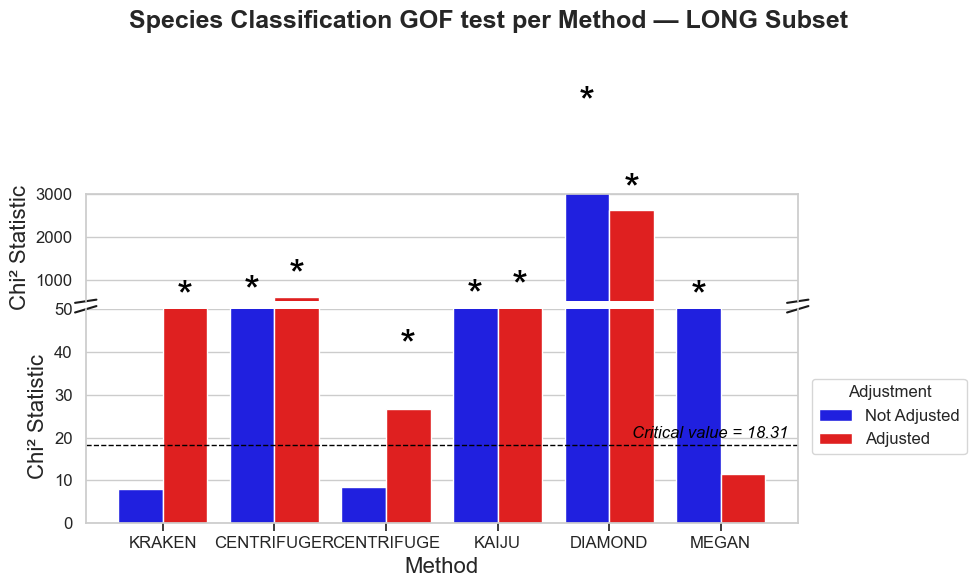

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar LONG subset
df_long = df_all[df_all['Subset'] == '200K_ZM Long'].copy()
df_long['Adjustment'] = df_long['Adjusted'].map({True: 'Adjusted', False: 'Not Adjusted'})

# Estilo
sns.set(style="whitegrid")

# Ajustar tamaño de fuente global
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Crear figura con dos ejes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2]})

# Límites y valor crítico
upper_limit = 3000
lower_limit = 50
critical_value = 18.31

# Gráfico inferior
barplot2 = sns.barplot(
    data=df_long,
    x='method',
    y='chi_squared_stat',
    hue='Adjustment',
    palette={'Adjusted': 'red', 'Not Adjusted': 'blue'},
    ax=ax2
)
ax2.axhline(critical_value, color='black', linestyle='--', linewidth=1)
ax2.set_ylim(0, lower_limit)
ax2.text(
    x=len(df_long['method'].unique()) - 0.4,
    y=critical_value + 1,
    s='Critical value = 18.31',
    ha='right',
    va='bottom',
    fontsize=12,
    style='italic',
    color='black'
)

# Gráfico superior
barplot1 = sns.barplot(
    data=df_long,
    x='method',
    y='chi_squared_stat',
    hue='Adjustment',
    palette={'Adjusted': 'red', 'Not Adjusted': 'blue'},
    ax=ax1
)
ax1.set_ylim(500, upper_limit)

# Añadir estrellas grandes a barras que superan el valor crítico
for i, row in df_long.iterrows():
    y_val = row['chi_squared_stat']
    x_pos = list(df_long['method'].unique()).index(row['method'])
    offset = 10
    hue_shift = -0.2 if row['Adjustment'] == 'Not Adjusted' else 0.2

    if y_val > critical_value:
        if y_val > lower_limit:
            ax1.text(
                x=x_pos + hue_shift, y=y_val + offset,
                s='*', ha='center', va='bottom', fontsize=30, color='black'
            )
        else:
            ax2.text(
                x=x_pos + hue_shift, y=y_val + offset,
                s='*', ha='center', va='bottom', fontsize=30, color='black'
            )

# Quitar duplicados de leyenda
ax1.legend_.remove()

# Estética del eje roto
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Diagonales de ruptura
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Títulos y etiquetas
fig.suptitle('Species Classification GOF test per Method — LONG Subset', fontsize=18, fontweight='bold')
ax2.set_xlabel('Method', fontsize=16)
ax1.set_ylabel('Chi² Statistic', fontsize=16)
ax2.set_ylabel('Chi² Statistic', fontsize=16)
ax2.legend(title='Adjustment', loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.show()


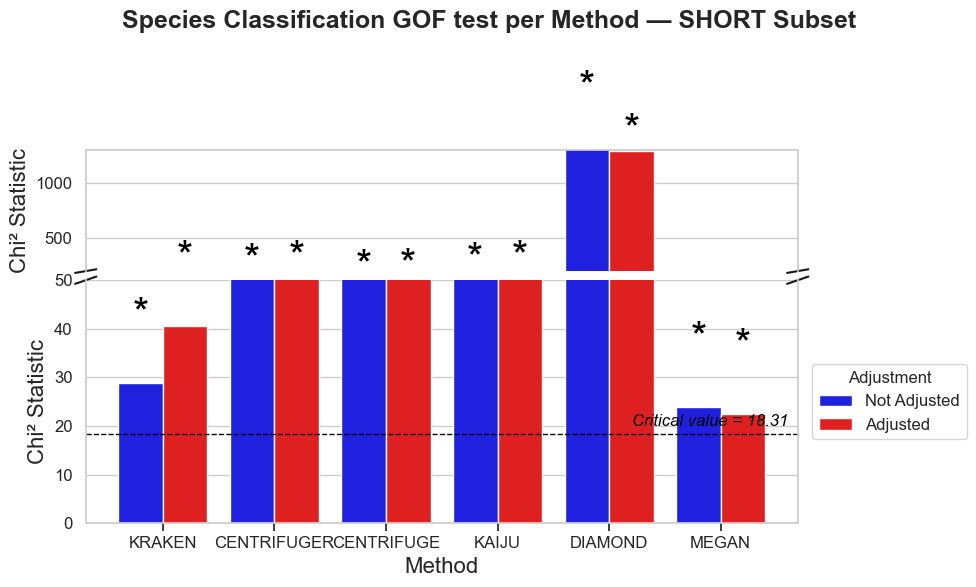

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar LONG subset
df_long = df_all[df_all['Subset'] == '200K_ZM Short'].copy()
df_long['Adjustment'] = df_long['Adjusted'].map({True: 'Adjusted', False: 'Not Adjusted'})

# Estilo
sns.set(style="whitegrid")

# Ajustar tamaño de fuente global
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Crear figura con dos ejes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2]})

# Límites y valor crítico
upper_limit = 1300
lower_limit = 50
critical_value = 18.31

# Gráfico inferior
barplot2 = sns.barplot(
    data=df_long,
    x='method',
    y='chi_squared_stat',
    hue='Adjustment',
    palette={'Adjusted': 'red', 'Not Adjusted': 'blue'},
    ax=ax2
)
ax2.axhline(critical_value, color='black', linestyle='--', linewidth=1)
ax2.set_ylim(0, lower_limit)
ax2.text(
    x=len(df_long['method'].unique()) - 0.4,
    y=critical_value + 1,
    s='Critical value = 18.31',
    ha='right',
    va='bottom',
    fontsize=12,
    style='italic',
    color='black'
)

# Gráfico superior
barplot1 = sns.barplot(
    data=df_long,
    x='method',
    y='chi_squared_stat',
    hue='Adjustment',
    palette={'Adjusted': 'red', 'Not Adjusted': 'blue'},
    ax=ax1
)
ax1.set_ylim(200, upper_limit)

# Añadir estrellas grandes a barras que superan el valor crítico
for i, row in df_long.iterrows():
    y_val = row['chi_squared_stat']
    x_pos = list(df_long['method'].unique()).index(row['method'])
    offset = 10
    hue_shift = -0.2 if row['Adjustment'] == 'Not Adjusted' else 0.2

    if y_val > critical_value:
        if y_val > lower_limit:
            ax1.text(
                x=x_pos + hue_shift, y=y_val + offset,
                s='*', ha='center', va='bottom', fontsize=30, color='black'
            )
        else:
            ax2.text(
                x=x_pos + hue_shift, y=y_val + offset,
                s='*', ha='center', va='bottom', fontsize=30, color='black'
            )

# Quitar duplicados de leyenda
ax1.legend_.remove()

# Estética del eje roto
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# Diagonales de ruptura
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Títulos y etiquetas
fig.suptitle('Species Classification GOF test per Method — SHORT Subset', fontsize=18, fontweight='bold')
ax2.set_xlabel('Method', fontsize=16)
ax1.set_ylabel('Chi² Statistic', fontsize=16)
ax2.set_ylabel('Chi² Statistic', fontsize=16)
ax2.legend(title='Adjustment', loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.show()
